In [1]:
import pandas as pd
import numpy as np

In [2]:
import plotly.express as px

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [5]:
wh2017 = pd.read_csv('2017.csv')

In [6]:
wh2017.describe()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


{'whiskers': [<matplotlib.lines.Line2D at 0x1ec6c248130>,
 'caps': [<matplotlib.lines.Line2D at 0x1ec6c2487f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ec6c231df0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ec6c248eb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ec6c252250>],
 'means': []}

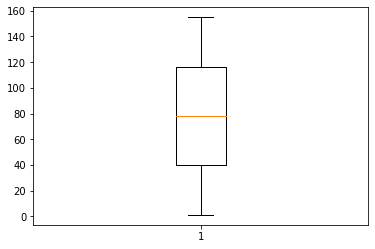

In [7]:
plt.boxplot( wh2017['Happiness.Rank'] )

<AxesSubplot:>

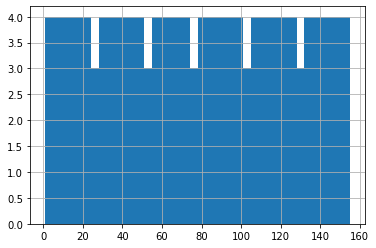

In [8]:
wh2017['Happiness.Rank'].hist( bins = 40 )

### Variance

In [9]:
np.var(wh2017.loc[0:38,'Happiness.Rank'])

126.66666666666667

In [10]:
np.var(wh2017.loc[39:77,'Happiness.Rank'])

126.66666666666667

In [11]:
np.var(wh2017.loc[78:116,'Happiness.Rank'])

126.66666666666667

In [12]:
np.var(wh2017.loc[117:,'Happiness.Rank'])

120.25

In [13]:
np.std(wh2017.loc[0:38,'Happiness.Rank'])

11.254628677422755

## Correlaciones

In [14]:
wh2017['Happiness.Score.x.2'] = wh2017['Happiness.Score'] * 2

In [15]:
wh2017.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual',
       'Happiness.Score.x.2'],
      dtype='object')

In [16]:
columns_to_use = ['Happiness.Score' ,'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual']

In [195]:
corr_use = wh2017.loc[ : , columns_to_use  ].corr()

In [196]:
corr_use

,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
Economy..GDP.per.Capita.,1.000000,0.688296,0.843077,0.369873,-0.019011,0.350944,0.024226
Family,0.688296,1.000000,0.612080,0.424966,0.051693,0.231841,0.070506
Health..Life.Expectancy.,0.843077,0.612080,1.000000,0.349827,0.063191,0.279752,0.054963
Freedom,0.369873,0.424966,0.349827,1.000000,0.316083,0.499183,0.081926
Generosity,-0.019011,0.051693,0.063191,0.316083,1.000000,0.294159,-0.116627
Trust..Government.Corruption.,0.350944,0.231841,0.279752,0.499183,0.294159,1.000000,-0.022755
Dystopia.Residual,0.024226,0.070506,0.054963,0.081926,-0.116627,-0.022755,1.000000


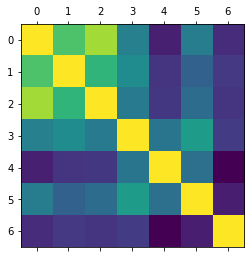

In [197]:
plt.matshow( corr_use )

<ipython-input-198-e5e2d83d035b>:3: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



<AxesSubplot:>

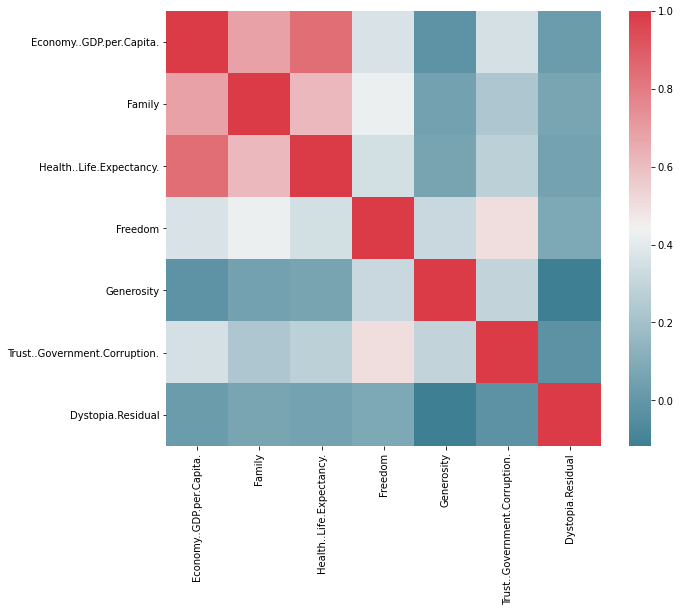

In [198]:
f, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(corr_use, mask=np.zeros_like(corr_use, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)


In [21]:
wh2017

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Happiness.Score.x.2
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,15.074
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,15.044
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,15.008
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,14.988
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,14.938
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,6.942
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574,6.924
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130,6.698
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024,5.810


In [22]:
wh2017['Whisker.high']

0      7.594445
1      7.581728
2      7.622030
3      7.561772
4      7.527542
         ...   
150    3.543030
151    3.663669
152    3.461430
153    3.074690
154    2.864884
Name: Whisker.high, Length: 155, dtype: float64

In [23]:
wh2017['Whisker.low']

0      7.479556
1      7.462272
2      7.385970
3      7.426227
4      7.410458
         ...   
150    3.398970
151    3.260331
152    3.236570
153    2.735310
154    2.521116
Name: Whisker.low, Length: 155, dtype: float64

In [24]:
def print_scatter(df, x_label, y_label):
    N = 155
    x = df[x_label]
    y = df[y_label]
    colors = np.random.rand(N)
    #area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

    plt.scatter(x, y, c=colors, alpha=0.5)
    plt.show()

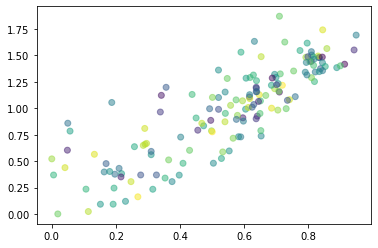

In [25]:
print_scatter(wh2017, 'Health..Life.Expectancy.', 'Economy..GDP.per.Capita.')

## PCA

In [194]:
columns_to_use = ['Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual']

In [199]:
x  = wh2017.loc[ : , columns_to_use ].values

In [200]:
StandardScaler().fit_transform(x)

array([[ 1.50618765,  1.20357658,  1.03816652, ...,  0.8569643 ,
         1.90308437,  0.85629599],
       [ 1.18651768,  1.26503623,  1.02081205, ...,  0.80685634,
         2.73999784,  0.92989102],
       [ 1.1823454 ,  1.47266877,  1.19425865, ...,  1.70201314,
         0.30006609,  0.94796425],
       ...,
       [-1.12910094, -0.51306362, -0.79063135, ...,  0.79923322,
        -0.56334657, -2.4660431 ],
       [-2.12929212, -1.95262416, -1.69157271, ..., -0.31596505,
        -0.38459935, -0.33549229],
       [-2.34773594, -4.15212515, -2.25371546, ...,  0.253028  ,
        -0.65680192,  0.43290816]])

In [201]:
pca = PCA(n_components=2)

In [202]:
principalComponents = pca.fit_transform(x)

In [203]:
pcadf = pd.DataFrame(data=principalComponents , columns=['c1','c2'])

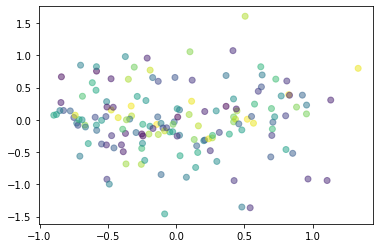

In [204]:
print_scatter(pcadf, 'c1', 'c2')

In [206]:
kmeans = KMeans(n_clusters=2).fit(pcadf)

In [207]:
centroids = kmeans.cluster_centers_
centroids

array([[ 0.5279408 ,  0.01789654],
       [-0.38129058, -0.01292528]])

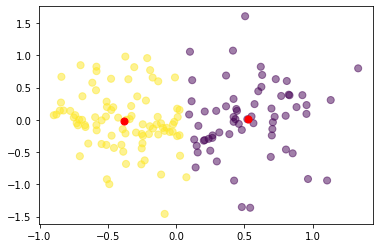

In [208]:
plt.scatter(pcadf['c1'], pcadf['c2'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [209]:
final_df = wh2017.loc[ : , columns_to_use ]

In [210]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [211]:
final_df["cluster"] = kmeans.labels_
final_df.cluster = final_df.cluster.astype(str)

In [212]:
final_df

,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,cluster
0,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,1
1,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,1
2,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,1
3,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,1
4,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,1
...,...,...,...,...,...,...,...,...
150,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,0
151,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574,0
152,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130,0
153,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024,0


In [213]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

In [214]:
fig = px.scatter(principalComponents, x=0, y=1, color=final_df['cluster'])

In [215]:
columns_to_use

['Economy..GDP.per.Capita.',
 'Family',
 'Health..Life.Expectancy.',
 'Freedom',
 'Generosity',
 'Trust..Government.Corruption.',
 'Dystopia.Residual']

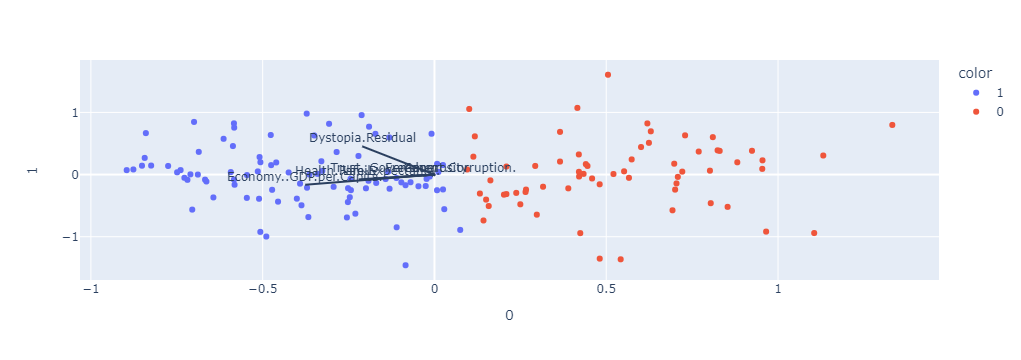

In [216]:
for i, feature in enumerate(columns_to_use):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()

In [146]:
final_df_cluster_0 = final_df.loc[ final_df['cluster'] == '0'  , : ]
final_df_cluster_1 = final_df.loc[ final_df['cluster'] == '1'  , : ]

In [147]:
final_df_cluster_0.describe()

,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,0.605310,0.968621,0.339092,0.348931,0.259719,0.097683,1.656422
std,0.307390,0.287339,0.190741,0.151527,0.138835,0.067553,0.505135
min,0.000000,0.000000,0.000000,0.000000,0.043785,0.015317,0.377914
25%,0.368746,0.803685,0.194129,0.254711,0.183469,0.060929,1.481890
50%,0.591683,0.997471,0.315090,0.380426,0.236298,0.084148,1.668191
75%,0.858428,1.179692,0.501180,0.454943,0.312651,0.116794,1.885631
max,1.198210,1.493011,0.731160,0.633376,0.838075,0.455220,3.117485


In [148]:
final_df_cluster_1.describe()

,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,1.258735,1.347987,0.704631,0.452014,0.237614,0.141492,1.990216
std,0.239534,0.149616,0.120105,0.133844,0.131776,0.117420,0.449330
min,0.728871,0.774864,0.437726,0.095731,0.000000,0.000000,0.554633
25%,1.094349,1.252349,0.617885,0.374561,0.147966,0.049104,1.724723
50%,1.285284,1.382299,0.703237,0.473908,0.224856,0.097956,1.999052
75%,1.439632,1.459355,0.810095,0.561567,0.328316,0.219585,2.276949
max,1.870766,1.610574,0.949492,0.658249,0.574731,0.464308,2.898639


## Repaso Box Plot, analisis de promedios y medianas

In [59]:
ejemploPromedios = pd.DataFrame( { "promedioVentas"  : [3,200,150,770,201,210,180,270] } )

{'whiskers': [<matplotlib.lines.Line2D at 0x238a63600a0>,
 'caps': [<matplotlib.lines.Line2D at 0x238a6360760>,
 'boxes': [<matplotlib.lines.Line2D at 0x238a6894cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x238a6360e20>],
 'fliers': [<matplotlib.lines.Line2D at 0x238a63701c0>],
 'means': []}

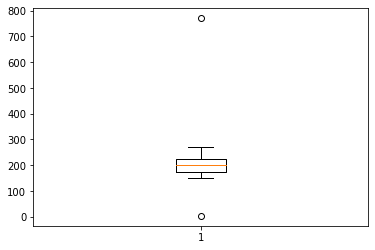

In [60]:
plt.boxplot( ejemploPromedios['promedioVentas']  )

In [65]:
p99 = np.quantile( ejemploPromedios['promedioVentas'] , .75 )
p01 = np.quantile( ejemploPromedios['promedioVentas'] , .25 )

In [66]:
p99

225.0

In [48]:
promedio  = np.mean( ejemploPromedios['promedioVentas'] )

In [55]:
np.median( ejemploPromedios['promedioVentas'] )

205.5

In [50]:
promedio

248.0

In [51]:
ejemploPromedios.loc[ ejemploPromedios['promedioVentas'] >= p99  , 'promedioVentas'  ] = promedio

In [52]:
ejemploPromedios.loc[ ejemploPromedios['promedioVentas'] <= p01  , 'promedioVentas'  ] = promedio

{'whiskers': [<matplotlib.lines.Line2D at 0x238a6553ca0>,
 'caps': [<matplotlib.lines.Line2D at 0x238a6636310>,
 'boxes': [<matplotlib.lines.Line2D at 0x238a6553940>],
 'medians': [<matplotlib.lines.Line2D at 0x238a66369d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x238a6636d30>],
 'means': []}

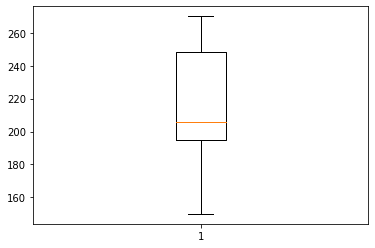

In [53]:
plt.boxplot( ejemploPromedios['promedioVentas']  )

In [54]:
np.mean( ejemploPromedios['promedioVentas'] )

213.375

## Fin repaso

## Repaso JOINS

In [6]:
ventas = pd.DataFrame({
    "Cliente" : ['A','B','A','A']
    , "Anio" : ['2019','2020','2021','2019']
    , "Ventas" : [2000,2100,2500,4000]
})

In [30]:
l2 = ventas.loc[ : , "Anio" ].drop_duplicates()

In [31]:
l1 = ventas.loc[ : , "Cliente" ].drop_duplicates()

In [28]:
from itertools import product

In [34]:
ClienteAnio = pd.DataFrame(list(product(l1, l2)), columns=['Cliente', 'Anio'])

In [42]:
Reporte = ClienteAnio.merge( ventas , on=['Cliente','Anio'] , how='left' ).fillna(0)

In [44]:
Reporte.groupby( ['Cliente','Anio'] , as_index=False ).agg({ 'Ventas' : ['sum'] })

,Cliente,Anio,Ventas
,,,sum
0,A,2019,6000.0
1,A,2020,0.0
2,A,2021,2500.0
3,B,2019,0.0
4,B,2020,2100.0
5,B,2021,0.0


In [39]:
ClienteAnio

,Cliente,Anio
0,A,2019
1,A,2020
2,A,2021
3,B,2019
4,B,2020
5,B,2021
